In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# データの分割
from sklearn.model_selection import train_test_split

# データセット
from tensorflow.keras.datasets import fashion_mnist

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [2]:
# データ読込
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# 形状の確認
print("x_train=", x_train.shape)
print("y_train=", y_train.shape)
print("x_test=", x_test.shape)
print("y_test=", y_test.shape)

x_train= (60000, 28, 28)
y_train= (60000,)
x_test= (10000, 28, 28)
y_test= (10000,)


In [4]:
# リスト作成
images = {label: [] for label in range(0,10)}

## 可視化

In [5]:
image_count = 0

for i in range(0, len(x_train)):
    if len(images[y_train[i]]) < 10:
        images[y_train[i]].append(x_train[i])
        image_count += 1
        if image_count == 100:
            break

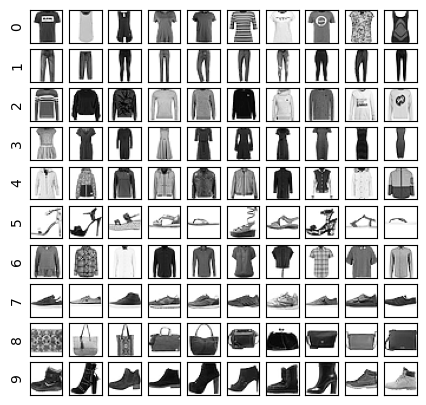

In [6]:
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

In [7]:
# reshape実施
x_train = x_train.reshape(len(x_train), 28, 28, 1)

x_test = x_test.reshape(len(x_test), 28, 28, 1)


In [8]:
# 形状の確認
print("x_train=", x_train.shape)
print("y_train=", y_train.shape)
print("x_test=", x_test.shape)
print("y_test=", y_test.shape)

x_train= (60000, 28, 28, 1)
y_train= (60000,)
x_test= (10000, 28, 28, 1)
y_test= (10000,)


In [9]:
print(type(x_train))


<class 'numpy.ndarray'>


In [11]:
# データ抽出
x_train2 = x_train[y_train <= 1]
y_train2 = y_train[y_train <= 1]
x_test2 = x_test[y_test <= 1]
y_test2 = y_test[y_test <= 1]

In [12]:
# タイプ確認
print(type(x_train2))
print(type(y_train2))
print(type(x_test2))
print(type(y_test2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# print("test")
# dress = x_train[y_train == 3]
# print("x_train3=", dress.shape)

# pants = x_train[y_train == 1]
# print("x_train3=", dress.shape)

# df["pants"] = pants

test
x_train3= (6000, 28, 28, 1)


In [11]:
# 形状の確認
print("x_train2=", x_train2.shape)
print("y_train2=", y_train2.shape)
print("x_test2=", x_test2.shape)
print("y_test2=", y_test2.shape)

x_train2= (12000, 28, 28, 1)
y_train2= (12000,)
x_test2= (2000, 28, 28, 1)
y_test2= (2000,)


In [12]:
# データの分割
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(x_train2, y_train2, test_size=0.3, random_state=0)

In [13]:
# 形状の確認
print("x_train2=", x_train2.shape)
print("y_train2=", y_train2.shape)
print("x_valid2=", x_valid2.shape)
print("y_valid2=", y_valid2.shape)

x_train2= (8400, 28, 28, 1)
y_train2= (8400,)
x_valid2= (3600, 28, 28, 1)
y_valid2= (3600,)


In [14]:
# target_names = {0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

In [15]:
from tensorflow.keras.layers import Flatten

In [16]:
# モデルの初期化
model = keras.Sequential()

model.add(Dense(10, activation='relu', input_shape=(28, 28, 1)))
model.add(Dense(10, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# 構築
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

2023-01-11 07:04:28.311056: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-11 07:04:28.312486: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-11 07:04:28.314509: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-3-167): /proc/driver/nvidia/version does not exist
2023-01-11 07:04:28.328722: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-11 07:04:28.421189: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2394475000 Hz
2023-01-11 07:04:28.426585: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4e580013e0 initialized for platform Host (this does not guarantee

In [17]:
# モデルの構造の表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 10)        20        
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 10)        110       
_________________________________________________________________
flatten (Flatten)            (None, 7840)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7841      
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time

# 学習の実施
log = model.fit(x_train2, y_train2, epochs=20, batch_size=100, verbose=True,
               callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       min_delta=0, patience=100,
                                                       verbose=1)],
               validation_data=(x_valid2, y_valid2))

Epoch 1/20


2023-01-11 07:04:28.661405: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 6585600 exceeds 10% of free system memory.


84/84 [==============================] - 2s 20ms/step - loss: 4.9763 - accuracy: 0.9199 - val_loss: 0.5193 - val_accuracy: 0.9817
Epoch 2/20
84/84 [==============================] - 1s 17ms/step - loss: 0.9729 - accuracy: 0.9689 - val_loss: 0.3290 - val_accuracy: 0.9811
Epoch 3/20
84/84 [==============================] - 1s 17ms/step - loss: 0.4445 - accuracy: 0.9755 - val_loss: 0.8789 - val_accuracy: 0.9547
Epoch 4/20
84/84 [==============================] - 1s 17ms/step - loss: 0.3637 - accuracy: 0.9764 - val_loss: 0.1410 - val_accuracy: 0.9831
Epoch 5/20
84/84 [==============================] - 1s 17ms/step - loss: 0.1641 - accuracy: 0.9796 - val_loss: 0.0774 - val_accuracy: 0.9814
Epoch 6/20
84/84 [==============================] - 1s 17ms/step - loss: 0.0886 - accuracy: 0.9805 - val_loss: 0.0575 - val_accuracy: 0.9806
Epoch 7/20
84/84 [==============================] - 1s 17ms/step - loss: 0.0532 - accuracy: 0.9812 - val_loss: 0.0454 - val_accuracy: 0.9825
Epoch 8/20
84/84 [======

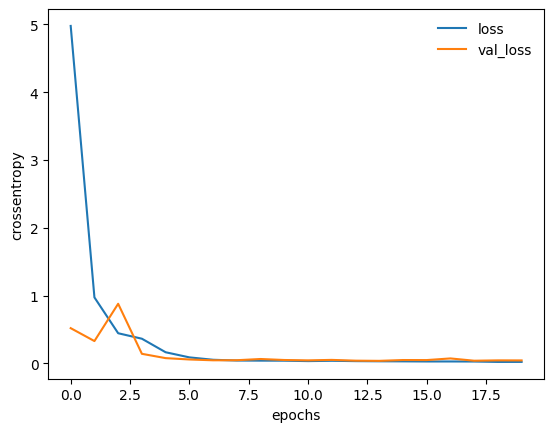

In [19]:
# 学習の過程のグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [20]:
# 予測
y_pred = model.predict(x_test2)

y_pred_cls = (y_pred > 0.5).astype("int32")

In [21]:
y_pred

array([[0.99982244],
       [0.9999995 ],
       [0.99822545],
       ...,
       [0.9999726 ],
       [0.9999591 ],
       [1.        ]], dtype=float32)

In [22]:
y_pred_cls

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [23]:
y_pred_ = y_pred_cls.reshape(-1)

In [24]:
# 評価
from sklearn.metrics import classification_report

print(classification_report(y_test2, y_pred_))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1000
           1       0.99      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

